In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from abc_functions import get_data

In [2]:
sales_orders, po_info, abc_report, delivery = get_data()

Your data: sales_orders, po_info, abc_report, delivery
Successfully loaded sales_orders!
Successfully loaded po_info!
Successfully loaded abc_report!
Successfully loaded delivery!
Done!


In [3]:
sales_orders.head()

,Sales Doc.,CRD header,Created on,Customer,Purchase order no.,Item,Material,Order Quantity,Prom.Date
0,22870642,2020-07-02,2020-06-30,1760089,9000133725,10,00000084391,35.0,2020-06-30
1,22870642,2020-07-02,2020-06-30,1760089,9000133725,20,01073747303,10.0,2020-06-30
2,22870642,2020-07-02,2020-06-30,1760089,9000133725,30,00000001046,31.0,2020-06-30
3,22870642,2020-07-02,2020-06-30,1760089,9000133725,40,01069215403,16.0,2020-06-30
4,22870642,2020-07-02,2020-06-30,1760089,9000133725,50,01173273201,10.0,2020-06-30


In [4]:
sales_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151909 entries, 0 to 152134
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Sales Doc.          151909 non-null  int64         
 1   CRD header          151909 non-null  datetime64[ns]
 2   Created on          151909 non-null  datetime64[ns]
 3   Customer            151909 non-null  int64         
 4   Purchase order no.  151909 non-null  object        
 5   Item                151909 non-null  int64         
 6   Material            151909 non-null  object        
 7   Order Quantity      151909 non-null  float64       
 8   Prom.Date           119919 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 11.6+ MB


In [5]:
po_info.head()

,Purch.Req.,Item,Material,PO Quantity
0,61538368.0,10,00000053013,2.0
1,61538370.0,10,00000001766,100.0
2,61538370.0,20,00000053013,11.0
3,61538370.0,30,01123497403,108.0
4,61538370.0,40,01151245802,70.0


In [6]:
po_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45669 entries, 0 to 45668
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Purch.Req.   41269 non-null  float64
 1   Item         45669 non-null  int64  
 2   Material     45669 non-null  object 
 3   PO Quantity  45669 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ MB


In [7]:
abc_report.head()

,Material,Safety Stock,ABC
0,00000283113,7,C
1,00000245917,4,C
2,00000259126,119,C
3,00000219743,1,C
4,00000224683,10,C


In [8]:
abc_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Material      1983 non-null   object
 1   Safety Stock  1983 non-null   int64 
 2   ABC           1983 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.6+ KB


In [9]:
delivery.head()

,Ref.doc.,Delivery,RefItm,Ac.GI date,Delivery quantity
0,22737649,28172414,10,2019-01-17,1.0
1,22736857,28173870,40,2019-01-18,9.0
2,22734775,28168597,10,2019-01-04,1.0
3,22734775,28168597,30,2019-01-04,2.0
4,22734775,28168597,50,2019-01-04,5.0


In [10]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144768 entries, 0 to 38995
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Ref.doc.           144768 non-null  int64         
 1   Delivery           144768 non-null  int64         
 2   RefItm             144768 non-null  int64         
 3   Ac.GI date         144753 non-null  datetime64[ns]
 4   Delivery quantity  144768 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 6.6 MB


In [11]:
sales_orders[sales_orders['Sales Doc.']==22736857]

,Sales Doc.,CRD header,Created on,Customer,Purchase order no.,Item,Material,Order Quantity,Prom.Date
53699,22736857,2019-02-15,2019-01-11,1786149,9000063183,30,01114732904,28.0,2019-01-11
53700,22736857,2019-02-15,2019-01-11,1786149,9000063183,40,01072746903,21.0,2019-01-23
53701,22736857,2019-02-15,2019-01-11,1786149,9000063183,50,01069653808,2.0,2019-01-11


In [12]:
sales_deliveries = sales_orders.merge(delivery, left_on=['Sales Doc.', 'Item'], right_on=['Ref.doc.', 'RefItm'], how='inner')

In [13]:
len(sales_deliveries)

141115

In [14]:
sales_and_deliveries=sales_deliveries.merge(abc_report, on='Material', how='inner')

In [15]:
# sales_and_deliveries.to_csv("sales_and_deliveries.csv", index=False)
# sales_and_deliveries.to_excel("sales_and_deliveries.xlsx", index=False)

In [16]:
# abc_po=po_info.merge(abc_report, on='Material', how='inner')

In [17]:
# abc_po.to_csv("abc_po.csv", index=False)
# abc_po.to_excel("abc_po.xlsx", index=False)

In [18]:
sales_and_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141115 entries, 0 to 141114
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Sales Doc.          141115 non-null  int64         
 1   CRD header          141115 non-null  datetime64[ns]
 2   Created on          141115 non-null  datetime64[ns]
 3   Customer            141115 non-null  int64         
 4   Purchase order no.  141115 non-null  object        
 5   Item                141115 non-null  int64         
 6   Material            141115 non-null  object        
 7   Order Quantity      141115 non-null  float64       
 8   Prom.Date           112351 non-null  datetime64[ns]
 9   Ref.doc.            141115 non-null  int64         
 10  Delivery            141115 non-null  int64         
 11  RefItm              141115 non-null  int64         
 12  Ac.GI date          141105 non-null  datetime64[ns]
 13  Delivery quantity   141115 no

In [19]:
sales_and_deliveries.head()

,Sales Doc.,CRD header,Created on,Customer,Purchase order no.,Item,Material,Order Quantity,Prom.Date,Ref.doc.,Delivery,RefItm,Ac.GI date,Delivery quantity,Safety Stock,ABC
0,22870642,2020-07-02,2020-06-30,1760089,9000133725,10,00000084391,35.0,2020-06-30,22870642,28376906,10,2020-07-01,35.0,33,B
1,22864957,2020-07-13,2020-06-05,1761695,10408,10,00000084391,3.0,2020-06-05,22864957,28368273,10,2020-06-08,3.0,33,B
2,22862781,2020-06-30,2020-05-27,1761265,wqf38497,50,00000084391,2.0,2020-05-27,22862781,28364930,50,2020-05-28,2.0,33,B
3,22848805,2020-06-01,2020-03-27,1769212,5290-MD,1490,00000084391,1.0,2020-03-27,22848805,28364289,1490,2020-05-29,1.0,33,B
4,22879606,2020-09-09,2020-08-04,1753005,4501709695,10,00000084391,1.0,2020-08-04,22879606,28389506,10,2020-08-12,1.0,33,B


In [20]:
sales_and_deliveries['days_between']=sales_and_deliveries['Ac.GI date'] - sales_and_deliveries['Created on']

In [21]:
sales_and_deliveries['days_between']=sales_and_deliveries['days_between'].apply(lambda x: x.days)

In [22]:
pd.DataFrame(sales_and_deliveries['days_between'].describe())

,days_between
count,141105.000000
mean,16.467864
std,25.186323
min,-1.000000
25%,1.000000
50%,6.000000
75%,20.000000
max,451.000000


Text(0.5, 1.0, 'Days Between Order Date and Shipment Date')

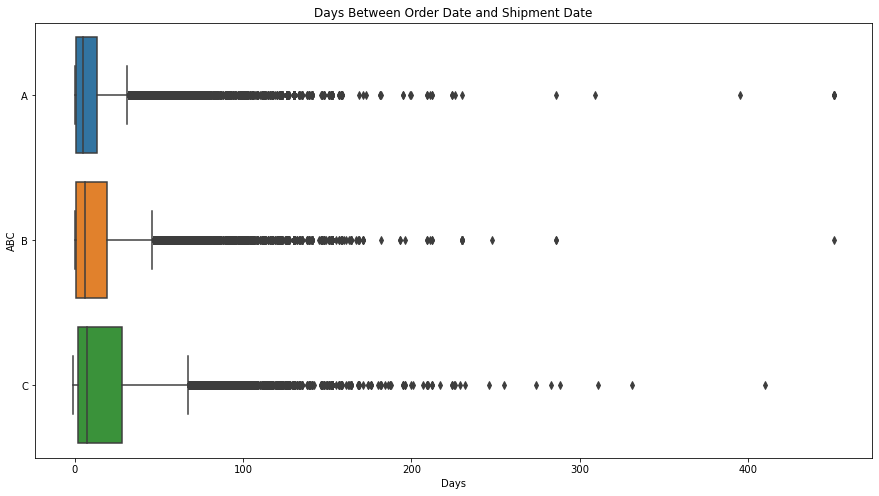

In [23]:
plt.subplots(figsize=(15,8))
sns.boxplot(x='days_between', y='ABC',data=sales_and_deliveries, order=['A', 'B', 'C'])
plt.xlabel('Days')
plt.title('Days Between Order Date and Shipment Date')

In [25]:
sales_and_deliveries['days_bw_prom_ac']=sales_and_deliveries['Ac.GI date'] - sales_and_deliveries['Prom.Date']
sales_and_deliveries['days_bw_prom_ac'] = sales_and_deliveries['days_bw_prom_ac'].apply(lambda x : x.days)

Text(0.5, 1.0, 'Days Between Promise Date and Shipment Date')

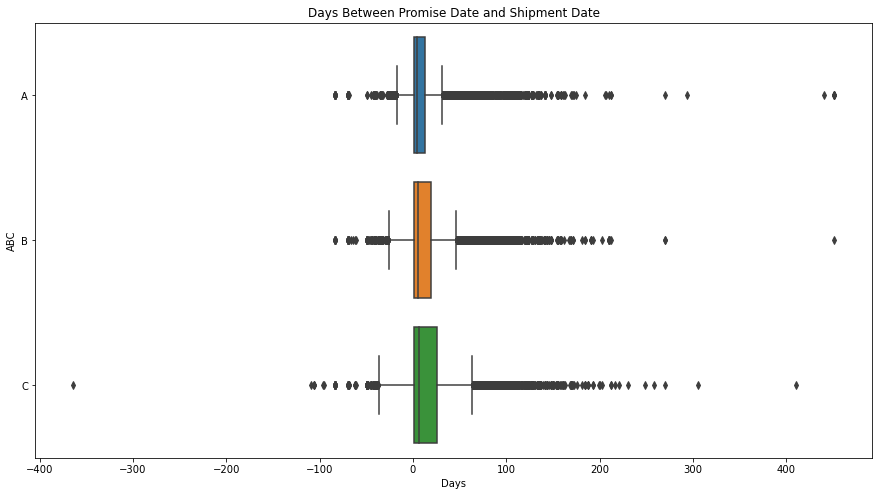

In [26]:
plt.subplots(figsize=(15,8))
sns.boxplot(x='days_bw_prom_ac', y='ABC',data=sales_and_deliveries, order=['A', 'B', 'C'])
plt.xlabel('Days')
plt.title('Days Between Promise Date and Shipment Date')

In [28]:
sales_and_deliveries
# promise date may not be reliable enough to use as a feature

,Sales Doc.,CRD header,Created on,Customer,Purchase order no.,Item,Material,Order Quantity,Prom.Date,Ref.doc.,Delivery,RefItm,Ac.GI date,Delivery quantity,Safety Stock,ABC,days_between,days_bw_prom_ac
0,22870642,2020-07-02,2020-06-30,1760089,9000133725,10,00000084391,35.0,2020-06-30,22870642,28376906,10,2020-07-01,35.0,33,B,1.0,1.0
1,22864957,2020-07-13,2020-06-05,1761695,10408,10,00000084391,3.0,2020-06-05,22864957,28368273,10,2020-06-08,3.0,33,B,3.0,3.0
2,22862781,2020-06-30,2020-05-27,1761265,wqf38497,50,00000084391,2.0,2020-05-27,22862781,28364930,50,2020-05-28,2.0,33,B,1.0,1.0
3,22848805,2020-06-01,2020-03-27,1769212,5290-MD,1490,00000084391,1.0,2020-03-27,22848805,28364289,1490,2020-05-29,1.0,33,B,63.0,63.0
4,22879606,2020-09-09,2020-08-04,1753005,4501709695,10,00000084391,1.0,2020-08-04,22879606,28389506,10,2020-08-12,1.0,33,B,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141110,221030593,2022-01-24,2021-11-30,1803257,759278,3980,04253802208,2.0,2021-12-17,221030593,28582295,3980,2022-01-17,2.0,1,C,48.0,31.0
141111,22950846,2021-06-09,2021-05-04,1773713,4001738508,1850,04253802208,1.0,2021-08-10,22950846,28529945,1850,2021-09-01,1.0,1,C,120.0,22.0
141112,22907606,2020-12-30,2020-11-20,1777303,4001685506,70,04253802208,2.0,2020-11-20,22907606,28435840,70,2020-12-11,2.0,1,C,21.0,21.0
141113,22913848,2021-02-11,2020-12-15,1798566,4001689503,100,04253802208,2.0,2020-12-15,22913848,28441433,100,2020-12-18,2.0,1,C,3.0,3.0


In [59]:
g=sales_and_deliveries.groupby(['Created on','ABC']).agg({'Sales Doc.':'nunique'}).reset_index()

In [66]:
g['month'] = g['Created on'].dt.month
g['year'] = g['Created on'].dt.year

In [44]:
g['Created on'] = g['Created on'].dt.strftime('%Y-%m')

In [48]:
f=g.groupby(['Created on', 'ABC']).agg({'Sales Doc.':'sum'}).reset_index()

In [51]:
import matplotlib.ticker as ticker

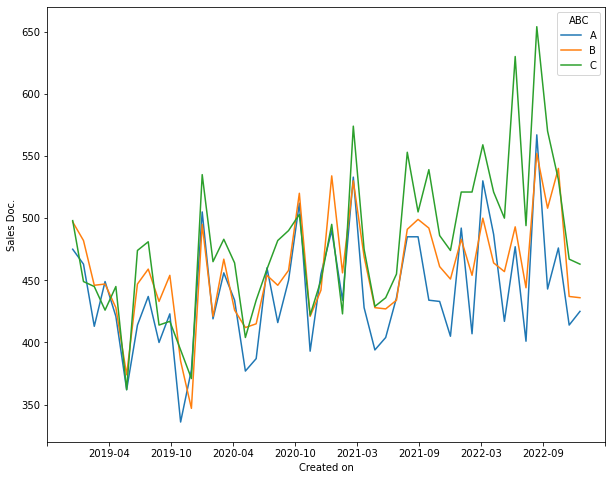

In [57]:
plt.subplots(figsize=(10,8))
plot_=sns.lineplot(x='Created on', y='Sales Doc.', data=f, hue='ABC')
plot_.xaxis.set_major_locator(ticker.LinearLocator(10))

In [67]:
h = g.groupby(['year','month', 'ABC']).agg({'Sales Doc.':'sum'}).reset_index()

<AxesSubplot:xlabel='month', ylabel='Sales Doc.'>

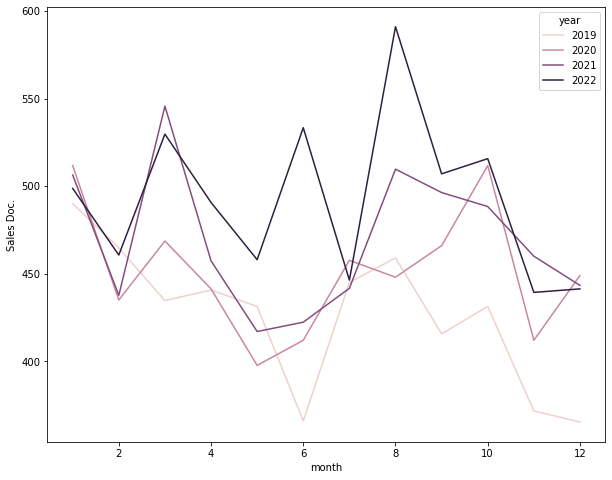

In [69]:
plt.subplots(figsize=(10,8))
sns.lineplot(x='month', y='Sales Doc.', data=h, hue='year', ci=None)
#plot_.xaxis.set_major_locator(ticker.LinearLocator(10))